## 1 Užduotis

Duota prekių pirkimo duomenų rinkinys, kuriame kiekvienas vartotojas yra nurodytas su jo pirkimo istorija (pavyzdžiui, pirkimo suma, pirkimo dažnis, kategorija, pirkimo data ir kt.). Užduotis yra suskirstyti vartotojus į klasterius pagal jų pirkimo elgesį.

Duomenų pavyzdys:

Vartotojas 1: {suma: 100€, dažnis: 3 kartai per mėn., kategorija: elektronika, data: 2023-01-15}
Vartotojas 2: {suma: 50€, dažnis: 1 kartą per savaitę, kategorija: maistas, data: 2023-01-20}
Vartotojas 3: {suma: 200€, dažnis: 2 kartus per mėn., kategorija: drabužiai, data: 2023-02-10}
ir tt.
Galimi sprendimo variantai:

Naudojant hierarchinį klasterizavimą, vartotojai gali būti suskirstyti į klasterius pagal jų pirkimo elgesį ir panašumus.
Atlikus klasterizavimą, galima analizuoti kiekvieno klasterio charakteristikas ir nustatyti, kokio tipo klientai dominuoja kiekviename klasteryje.

P.S. duomenų susikūrimui galite naudoti make_blobs(), kurią importuosite iš sklearn.datasets arba tiesiog aprasykite ranka

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

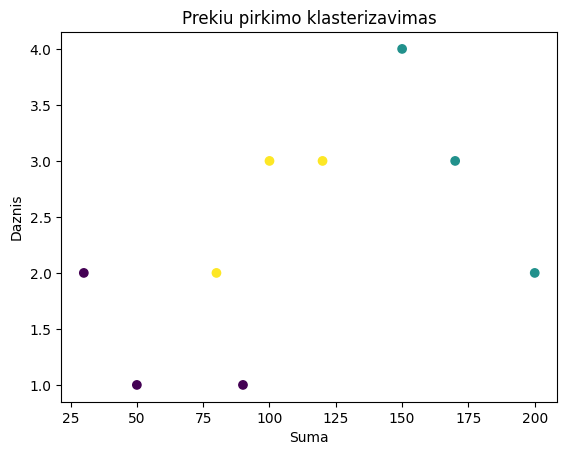

In [41]:
data = pd.read_csv('prekes.csv')

numerical_features = data[['suma', 'daznis']]

scaler = StandardScaler()
scaler_data = scaler.fit_transform(numerical_features)

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaler_data)


plt.scatter(data['suma'], data['daznis'], c=clusters, cmap='viridis')
plt.xlabel('Suma')
plt.ylabel('Daznis')
plt.title('Prekiu pirkimo klasterizavimas')
plt.show()

## 2 Užduotis


Užduotis 2: K-vidurkių klasterizavimo užduotis

Duota gyventojų duomenų rinkinys, kuriame kiekvienas gyventojas yra nurodytas su jo amžiumi ir pajamomis. Užduotis yra suskirstyti gyventojus į klasterius pagal jų amžių ir pajamas.

Duomenų pavyzdys:

Gyventojas 1: {amžius: 35 metai, pajamos: 30000€}
Gyventojas 2: {amžius: 50 metai, pajamos: 45000€}
Gyventojas 3: {amžius: 25 metai, pajamos: 25000€}
ir tt.
Galimi sprendimo variantai:

Naudojant K-vidurkių klasterizavimą, gyventojai gali būti suskirstyti į klasterius pagal jų amžių ir pajamas.
Po klasterizavimo galima vizualizuoti klasterius ir jų centroidus, kad būtų lengviau interpretuoti gautus rezultatus.

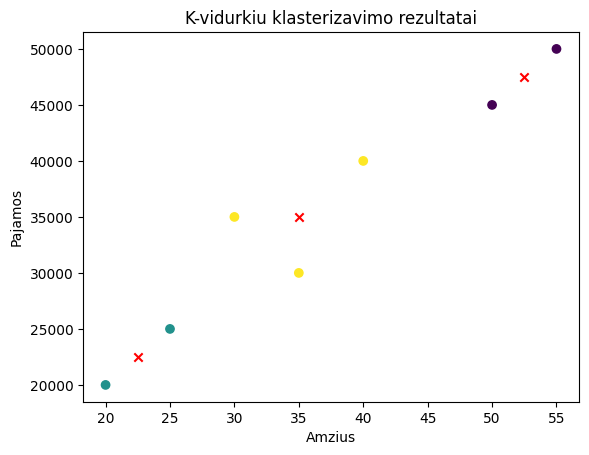

In [24]:
data = pd.read_csv('gyventojai.csv')

X = data.values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], marker='x', c='red')
plt.xlabel('Amzius')
plt.ylabel('Pajamos')
plt.title('K-vidurkiu klasterizavimo rezultatai')
plt.show()

## 3 Užduotis

Duota GPS sekimo duomenų rinkinys, kuriame yra įrašyti automobilių judėjimo taškai miesto centre. Užduotis yra identifikuoti pagrindinius automobilių maršrutus pagal duomenų taškų tankumą.

Duomenų pavyzdys:

Taškas 1: {lat: 54.6789, lon: 25.2798, laikas: 2023-01-15 08:00:00}
Taškas 2: {lat: 54.6890, lon: 25.2900, laikas: 2023-01-15 08:10:00}
Taškas 3: {lat: 54.6830, lon: 25.2750, laikas: 2023-01-15 08:20:00}
ir tt.
Galimi sprendimo variantai:

Naudodami DBSCAN klasterizavimą, galima identifikuoti pagrindinius automobilių maršrutus miesto centre pagal taškų tankumą.

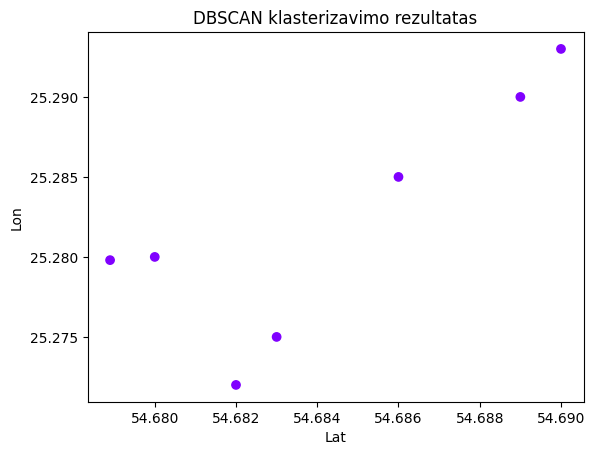

In [46]:
data = pd.read_csv('gps.csv')

X = data[['lat', 'lon']].values

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters, cmap='rainbow')
plt.title('DBSCAN klasterizavimo rezultatas')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.show()